In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('scatter_data.csv')

In [3]:
df.columns

Index(['% x', ' y '], dtype='object')

In [4]:
x = df['% x']
y = df[' y ']

In [5]:
min_x=min(x)
max_x=max(x)
y_max=y[x.idxmax()]
y_min=y[x.idxmin()]

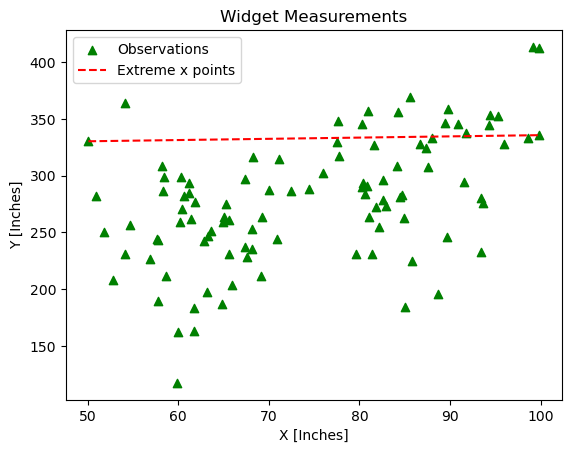

In [6]:
plt.scatter(x, y, marker='^', color='green', label='Observations')
plt.plot([min_x,max_x],[y_min, y_max],'r--', label='Extreme x points')
plt.title('Widget Measurements')
plt.xlabel('X [Inches]')
plt.ylabel('Y [Inches]')
plt.legend()
plt.show()

In [7]:
df = pd.read_csv('student_grades.csv')
df.columns

Index(['% studentID', ' avgScore '], dtype='object')

In [8]:
bins_ = [0, 60, 70, 80, 90, 100]
score_ = df[' avgScore ']
grade_labels_ = ['F', 'D', 'C', 'B', 'A']

In [9]:
counts = [len([score for score in score_ if score >= bins_[i] and score < bins_[i+1]]) for i in range(len(bins_) - 1)]

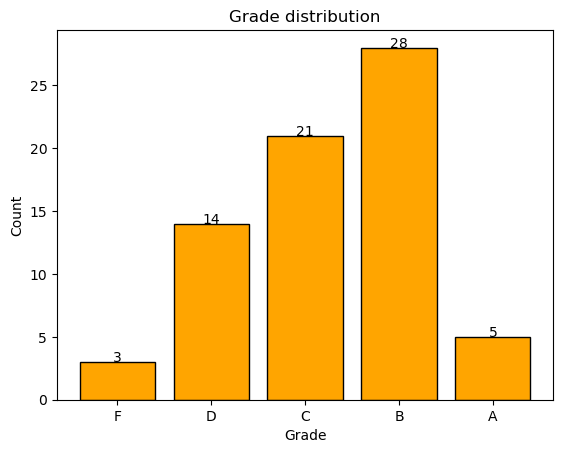

In [10]:
plt.bar(np.arange(len(grade_labels_)), counts, color='orange', edgecolor='black')
plt.xticks(np.arange(len(grade_labels_)), grade_labels_)
for i, count in enumerate(counts):
    plt.text(i, count , str(count),fontsize=10,color='black',ha='center')

plt.title('Grade distribution')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

C:\Users\ENGEMP156\AppData\Local\Temp\ipykernel_7288\1005525350.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  average_gap_axis.set_xticklabels(heuristic_methods_list)


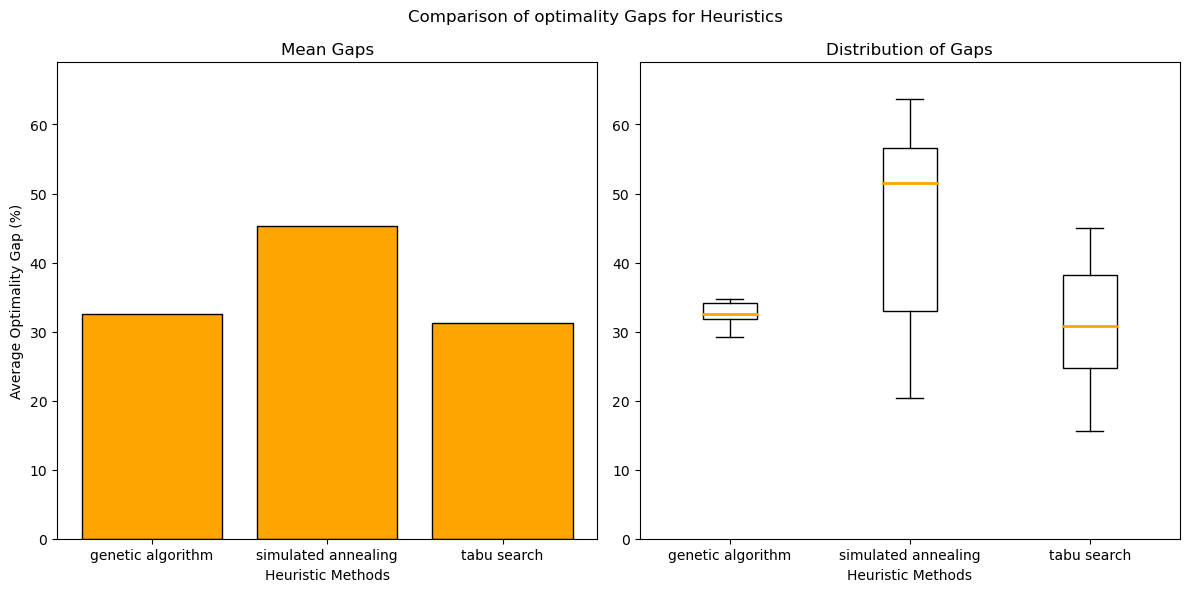

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

optimization_data = pd.read_csv("solution_data.csv")

filtered_data = optimization_data[~optimization_data['% Problem'].astype(str).str.startswith('%')]

heuristic_methods_list = ["genetic algorithm", "simulated annealing", "tabu search"]

optimal_solution_data = filtered_data.groupby("% Problem")["Value"].max().reset_index()

optimal_solution_data.rename(columns={'Value': 'Optimal_Solution_Value'}, inplace=True)

data_with_optimal_values = filtered_data.merge(optimal_solution_data, on='% Problem', how='left')

data_with_optimal_values["Percentage_Optimality_Gap"] = (
    (data_with_optimal_values["Optimal_Solution_Value"] - data_with_optimal_values["Value"]) /
    data_with_optimal_values["Optimal_Solution_Value"]) * 100

comparison_data = data_with_optimal_values[data_with_optimal_values["SolnMethod"] != "optimal"]

optimality_gap_groups = comparison_data.groupby('SolnMethod')['Percentage_Optimality_Gap'].apply(list)
optimality_gap_dict = optimality_gap_groups.to_dict()


optimality_gap_frame = pd.DataFrame(optimality_gap_dict)


fig, (average_gap_axis, distribution_gap_axis) = plt.subplots(1, 2, figsize=(12, 6))


average_optimality_gaps = comparison_data.groupby("SolnMethod")["Percentage_Optimality_Gap"].mean()
average_gap_axis.bar(heuristic_methods_list, average_optimality_gaps, color='orange', edgecolor='black')
average_gap_axis.set_xticklabels(heuristic_methods_list)
average_gap_axis.set_ylabel('Average Optimality Gap (%)')
average_gap_axis.set_xlabel('Heuristic Methods')
average_gap_axis.set_title('Mean Gaps')
average_gap_axis.set_ylim(0, 69)


distribution_box_plot = distribution_gap_axis.boxplot(optimality_gap_frame, patch_artist=True, labels=heuristic_methods_list)
distribution_gap_axis.set_title('Distribution of Gaps')
distribution_gap_axis.set_xlabel('Heuristic Methods')
distribution_gap_axis.set_ylim(0, 69)


shared_ylim = max(average_gap_axis.get_ylim()[1], distribution_gap_axis.get_ylim()[1])
average_gap_axis.set_ylim(0, shared_ylim)
distribution_gap_axis.set_ylim(0, shared_ylim)


for median_line in distribution_box_plot['medians']:
    median_line.set(color='orange', linewidth=2)
for box_patch in distribution_box_plot['boxes']:
    box_patch.set_facecolor('white')

fig.suptitle('Comparison of optimality Gaps for Heuristics', fontsize=12)

plt.tight_layout()

plt.show()

#Part 2

In [16]:
data=pd.read_csv("gender_submission.csv")

In [17]:
survival_counts = data['Survived'].value_counts(normalize=True)

1. **Explode parameter setup:**

   ```python
   explode = (0.1, 0)
   ```
   The `explode` parameter is used to offset a slice of the pie chart. In this case, I've set it to `explode` only the first slice, which corresponds to passengers who did not survive. This helps to highlight this slice for better visual emphasis.

2. **Pie chart creation:**

   ```python
   fig, ax = plt.subplots()
   ax.pie(survival_counts, explode=explode, labels=['Not Survived', 'Survived'], autopct='%1.1f%%',
          startangle=90, pctdistance=0.85, colors=['tomato', 'lightgreen'])
   ```
   - `fig, ax = plt.subplots()`: Initializes a figure and creates a single subplot.
   - `ax.pie(...)`: Creates a pie chart.
   - `survival_counts`: The data used to create the pie chart, which contains the survival proportions.
   - `labels=['Not Survived', 'Survived']`: The labels for each slice of the pie.
   - `autopct='%1.1f%%'`: A string formatting directive that displays the percentage value of each slice up to 1 decimal place.
   - `startangle=90`: The starting angle of the first slice. By setting it to 90 degrees, the chart starts from the top.
   - `pctdistance=0.85`: The radial distance at which the percentage value will be placed inside the slices.
   - `colors=['tomato', 'lightgreen']`: The colors used for the slices.

3. **Creating a donut chart:**

   ```python
   centre_circle = plt.Circle((0, 0), 0.70, fc='white')
   fig.gca().add_artist(centre_circle)
   ```
   - `plt.Circle((0, 0), 0.70, fc='white')`: Creates a white circle at the center of the pie chart to create a donut-like appearance. The `(0, 0)` indicates the center of the circle, `0.70` is the radius, and `fc` stands for facecolor, which is set to white.
   - `fig.gca().add_artist(centre_circle)`: Adds the created circle to the pie chart to overlay it, effectively turning the pie chart into a donut chart.

4. **Ensuring the chart is a circle:**

   ```python
   ax.axis('equal')
   ```
   This line ensures that the pie chart is drawn as a circle by setting the aspect ratio of the plot to be equal.

5. **Plot adjustments and display:**

   ```python
   plt.tight_layout()
   plt.title('Survival Distribution (Donut Chart)')
   plt.show()
   ```
   - `plt.tight_layout()`: Adjusts the plot layout so that it fits neatly within the figure area.
   - `plt.title(...)`: Adds a title to the chart.
   - `plt.show()`: Displays the chart.

This code results in a visually appealing donut chart that effectively shows the proportion of passengers who survived versus those who did not in the dataset.

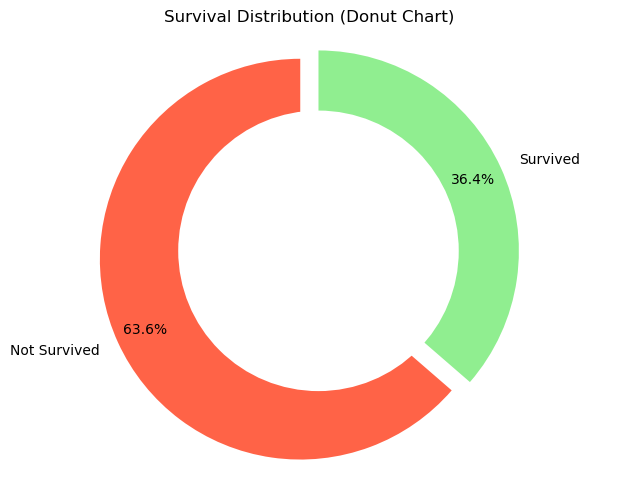

In [22]:
explode = (0.1, 0)
fig, ax = plt.subplots()
ax.pie(survival_counts, explode=explode, labels=['Not Survived', 'Survived'], autopct='%1.1f%%',
       startangle=90, pctdistance=0.85, colors=['tomato', 'lightgreen'])

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
ax.axis('equal')

plt.tight_layout()
plt.title('Survival Distribution (Donut Chart)')
plt.show()

**Here's a donut chart that illustrates the survival distribution from the dataset**:

The red section represents passengers who did not survive, accounting for 63.6%.

The green section represents passengers who survived, accounting for 36.4%.

The donut chart provides a clear visual distinction between the two categories

 If there's another specific type of plot you're interested in, or if you have any other requests for analysis, feel free to let me know!​
 
 
 Data Source: https://www.kaggle.com/competitions/titanic/data